In [1]:
import pandas as pd

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

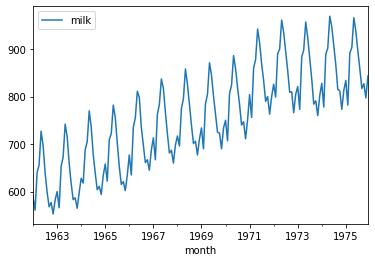

In [3]:
milk.plot()

In [4]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk)

(-1.3038115874221272,
 0.6274267086030327,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [5]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [6]:
milk_daily = milk['milk'] / milk.index.days_in_month

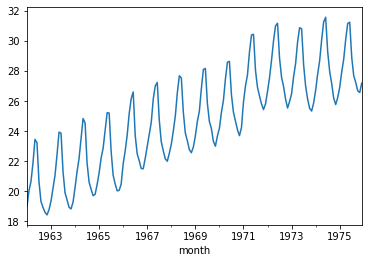

In [7]:
milk_daily.plot()

In [8]:
milk_daily.sum()

4166.326661899466

In [9]:
milk_daily_diff1 = milk_daily - milk_daily.shift(1)
milk_daily_diff1 = milk_daily_diff1[1:]
milk_daily_diff1.head()

month
1962-02-01    1.035714
1962-03-01    0.609447
1962-04-01    1.221505
1962-05-01    1.584946
1962-06-01   -0.218280
dtype: float64

In [10]:
milk_daily_diff12 = milk_daily - milk_daily.shift(12)
milk_daily_diff12 = milk_daily_diff12[12:]
milk_daily_diff12.head()

month
1963-01-01    0.354839
1963-02-01    0.178571
1963-03-01    0.419355
1963-04-01    0.566667
1963-05-01    0.483871
dtype: float64

In [11]:
sm.tsa.stattools.adfuller(milk_daily_diff1)

(-2.759469476228912,
 0.06430054654174672,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.1539973381055688)

In [12]:
sm.tsa.stattools.adfuller(milk_daily_diff12)

(-2.159486093288807,
 0.221276726588304,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

In [13]:
milk_daily_diff_1_12 = milk_daily_diff1 - milk_daily_diff1.shift(12)
milk_daily_diff_1_12 = milk_daily_diff_1_12[12:]
milk_daily_diff_1_12.head()

month
1963-02-01   -0.176267
1963-03-01    0.240783
1963-04-01    0.147312
1963-05-01   -0.082796
1963-06-01    0.149462
dtype: float64

In [14]:
sm.tsa.stattools.adfuller(milk_daily_diff_1_12)

(-5.481326334796927,
 2.2808455518037347e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.90513750989237)

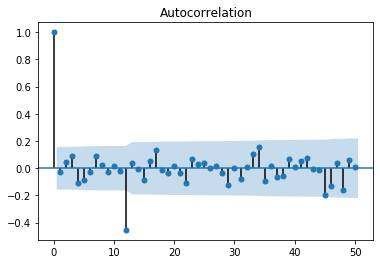

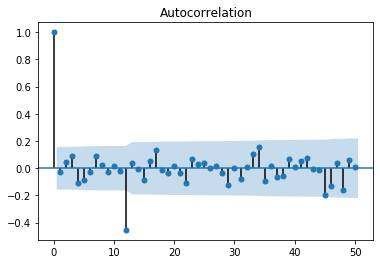

In [26]:

sm.graphics.tsa.plot_acf(milk_daily_diff_1_12.values.squeeze(), lags = 50)

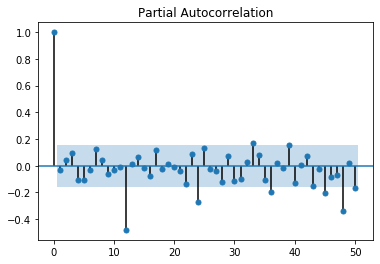

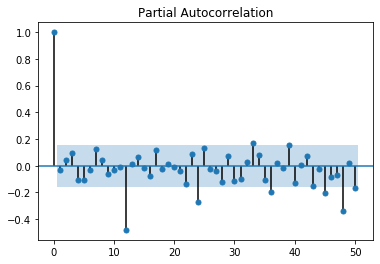

In [27]:
sm.graphics.tsa.plot_pacf(milk_daily_diff_1_12.values.squeeze(), lags = 50)